importing important libraries and dependencies

In [25]:
import pandas as pd 
import nltk # natural language processing for tokenization, lemmatization, stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#sentiment analysis
from textblob import TextBlob # textblob for lexicon-based sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer # vader for lexicon-based sentiment analysis
from sklearn.feature_extraction.text import TfidfVectorizer # to extract key words based on weights of frequency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # naive bayes classifier for machine learning based analysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans # k-means clustering for unsupervised learning

#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

downloading necessary data kit

In [4]:
nltk.download('punkt') # used for tokenization
nltk.download('stopwords') # gives a bunch of stopwords
nltk.download('wordnet') # used for lemmatization
nltk.download('punkt_tab') # used for tokenization with non-english texts
nltk.download('vader_lexicon') # vader for lexicon-based analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

loading the data

In [5]:
df = pd.read_csv('data cleaning script and data/commercialBank_cleaned.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source
0,0,0,a great app. it's like carrying a bank in your...,4,2025-06-07 20:21:52,Commercial Bank of Ethiopia,Google Play Store
1,1,1,more than garrantty bank ebc.,4,2025-06-07 18:21:26,Commercial Bank of Ethiopia,Google Play Store
2,2,2,really am happy to this app it is siple to use...,5,2025-06-07 11:02:38,Commercial Bank of Ethiopia,Google Play Store
3,3,3,i liked this app. but the user interface is ve...,2,2025-06-07 10:50:29,Commercial Bank of Ethiopia,Google Play Store
4,4,4,"""why don’t your atms support account-to-accoun...",4,2025-06-06 09:54:11,Commercial Bank of Ethiopia,Google Play Store


removing stop words, lemmatization and tokenization the "content"

In [11]:
import re
def text(text):
    tokens = word_tokenize(str(text))
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['final_review'] = df['review'].apply(text)

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review
0,0,0,a great app. it's like carrying a bank in your...,4,2025-06-07 20:21:52,Commercial Bank of Ethiopia,Google Play Store,great app like carrying bank pocket
1,1,1,more than garrantty bank ebc.,4,2025-06-07 18:21:26,Commercial Bank of Ethiopia,Google Play Store,garrantty bank ebc
2,2,2,really am happy to this app it is siple to use...,5,2025-06-07 11:02:38,Commercial Bank of Ethiopia,Google Play Store,really happy app siple use everything
3,3,3,i liked this app. but the user interface is ve...,2,2025-06-07 10:50:29,Commercial Bank of Ethiopia,Google Play Store,liked app user interface basic attractive
4,4,4,"""why don’t your atms support account-to-accoun...",4,2025-06-06 09:54:11,Commercial Bank of Ethiopia,Google Play Store,atm support transfer like country kenya nigeri...


Sentiment analysis using textblob

In [13]:
def textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.polarity > 0:
        return 'positive'
    elif analysis.polarity < 0:
        return 'negative'  
    return 'neutral'

df['textBlob_result'] = df['final_review'].apply(textblob_sentiment)
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review,textBlob_result
0,0,0,a great app. it's like carrying a bank in your...,4,2025-06-07 20:21:52,Commercial Bank of Ethiopia,Google Play Store,great app like carrying bank pocket,positive
1,1,1,more than garrantty bank ebc.,4,2025-06-07 18:21:26,Commercial Bank of Ethiopia,Google Play Store,garrantty bank ebc,neutral
2,2,2,really am happy to this app it is siple to use...,5,2025-06-07 11:02:38,Commercial Bank of Ethiopia,Google Play Store,really happy app siple use everything,positive
3,3,3,i liked this app. but the user interface is ve...,2,2025-06-07 10:50:29,Commercial Bank of Ethiopia,Google Play Store,liked app user interface basic attractive,positive
4,4,4,"""why don’t your atms support account-to-accoun...",4,2025-06-06 09:54:11,Commercial Bank of Ethiopia,Google Play Store,atm support transfer like country kenya nigeri...,neutral


Sentiment analysis using vader

In [14]:
def vader_sentiment(text):
    analysis = SentimentIntensityAnalyzer().polarity_scores(text)
    if analysis['compound'] > 0:
        return 'positive'
    elif analysis['compound'] < 0:
        return 'negative'  
    return 'neutral'

df['vader_result'] = df['final_review'].apply(vader_sentiment)
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review,textBlob_result,vader_result
0,0,0,a great app. it's like carrying a bank in your...,4,2025-06-07 20:21:52,Commercial Bank of Ethiopia,Google Play Store,great app like carrying bank pocket,positive,positive
1,1,1,more than garrantty bank ebc.,4,2025-06-07 18:21:26,Commercial Bank of Ethiopia,Google Play Store,garrantty bank ebc,neutral,neutral
2,2,2,really am happy to this app it is siple to use...,5,2025-06-07 11:02:38,Commercial Bank of Ethiopia,Google Play Store,really happy app siple use everything,positive,positive
3,3,3,i liked this app. but the user interface is ve...,2,2025-06-07 10:50:29,Commercial Bank of Ethiopia,Google Play Store,liked app user interface basic attractive,positive,positive
4,4,4,"""why don’t your atms support account-to-accoun...",4,2025-06-06 09:54:11,Commercial Bank of Ethiopia,Google Play Store,atm support transfer like country kenya nigeri...,neutral,positive


Sentimental analysis using Naive-Bayes model

In [15]:
# preparing the labeled data for training
def label(n):
    if n > 3:
        return 'positive'
    elif n < 3:
        return 'negative'
    return 'neutral'
df['label'] = df['rating'].apply(label)

vectorizing the review ( mapping each words to a numerical value that the Naive-bayes can work on)
TF(word) = (Number of times word appears in a document) / (Total words in the document)
IDF(word) = log(Total number of documents / Number of documents containing the word)
TF-IDF(word) = TF(word) * IDF(word)

In [16]:
vectorizer = TfidfVectorizer()
input_feature = vectorizer.fit_transform(df['final_review'])
label = df['label']


spliting the data as test and train data and training the NB model

In [17]:
input_train, input_test, label_train, label_test = train_test_split(input_feature, label, test_size=0.3, random_state=50)

naive_bayes = MultinomialNB()
naive_bayes.fit(input_train,label_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


checking the accuracy of the model

In [18]:
predicted = naive_bayes.predict(input_test)
print(f"Accuracy: {accuracy_score(label_test,predicted)}")

Accuracy: 0.7809862283429587


o.78 accuracy shows that if we judge the review based on the given star then the given star will tell about the reviews sentiment with > 78% accuracy

KeyWord Extraction using TF-IDF

In [19]:
vectorizer = TfidfVectorizer(max_features=100)
input = vectorizer.fit_transform(df['final_review'])
keyword = vectorizer.get_feature_names_out()
print(keyword)

['access' 'account' 'add' 'also' 'always' 'amazing' 'app' 'application'
 'apps' 'bad' 'balance' 'bank' 'banking' 'best' 'better' 'birr' 'branch'
 'ca' 'cbe' 'code' 'could' 'customer' 'day' 'developer' 'download' 'easy'
 'error' 'ethiopia' 'even' 'ever' 'every' 'excellent' 'fast' 'feature'
 'fix' 'friendly' 'get' 'go' 'good' 'great' 'help' 'history' 'issue' 'job'
 'keep' 'last' 'life' 'like' 'love' 'make' 'mobile' 'money' 'much' 'need'
 'network' 'new' 'nice' 'ok' 'one' 'option' 'payment' 'perfect' 'phone'
 'please' 'previous' 'problem' 'really' 'recent' 'say' 'see' 'send'
 'service' 'show' 'simple' 'sometimes' 'statement' 'system' 'thank'
 'thanks' 'thing' 'time' 'transaction' 'transfer' 'try' 'update' 'updated'
 'use' 'used' 'user' 'using' 'verification' 'version' 'well' 'work'
 'working' 'would' 'wow' 'year' 'በጣም' 'ነው']


Extracting the positive and negative keyword

In [20]:
positive = df[df['textBlob_result']=='positive']['final_review']
neutral = df[df['textBlob_result']=='neutral']['final_review']
negative = df[df['textBlob_result']=='negative']['final_review']

In [21]:
vectorizer = TfidfVectorizer(max_features=20)
positive_input = vectorizer.fit_transform(positive)
positive_words = vectorizer.get_feature_names_out()


vectorizer = TfidfVectorizer(max_features=20)
neutral_input = vectorizer.fit_transform(neutral)
neutral_words = vectorizer.get_feature_names_out()


vectorizer = TfidfVectorizer(max_features=20)
negative_input = vectorizer.fit_transform(negative)
negative_words = vectorizer.get_feature_names_out()

Grouping the extracted data

In [26]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=40)
kmeans.fit(negative_input)

terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_keywords = [terms[ind] for ind in order_centroids[i, :50]]
    print(f"Cluster {i}: {', '.join(top_keywords)}")

Cluster 0: bad, app, even, please, bank, time, use, transfer, work, working, account, application, worst, make, poor, transaction, update, money, cbe, get
Cluster 1: transaction, app, make, time, please, update, account, application, money, work, cbe, use, get, transfer, bad, working, even, bank, worst, poor
Cluster 2: bank, money, transfer, app, time, even, account, worst, get, use, cbe, application, bad, work, make, poor, transaction, update, working, please
Cluster 3: update, poor, working, application, cbe, time, account, work, use, even, please, worst, get, transfer, make, app, money, bad, bank, transaction
Cluster 4: app, worst, update, poor, use, please, cbe, work, time, even, make, bank, working, account, transaction, get, transfer, money, bad, application


In [22]:
print(positive_words)
print(neutral_words)
print(negative_words)

['app' 'application' 'bank' 'banking' 'best' 'cbe' 'easy' 'excellent'
 'fast' 'good' 'great' 'like' 'nice' 'one' 'service' 'time' 'transaction'
 'update' 'use' 'work']
['account' 'app' 'bank' 'banking' 'ca' 'cbe' 'code' 'fix' 'get' 'like'
 'please' 'thank' 'transaction' 'transfer' 'update' 'use' 'work' 'working'
 'በጣም' 'ነው']
['account' 'app' 'application' 'bad' 'bank' 'cbe' 'even' 'get' 'make'
 'money' 'please' 'poor' 'time' 'transaction' 'transfer' 'update' 'use'
 'work' 'working' 'worst']


Visiualization

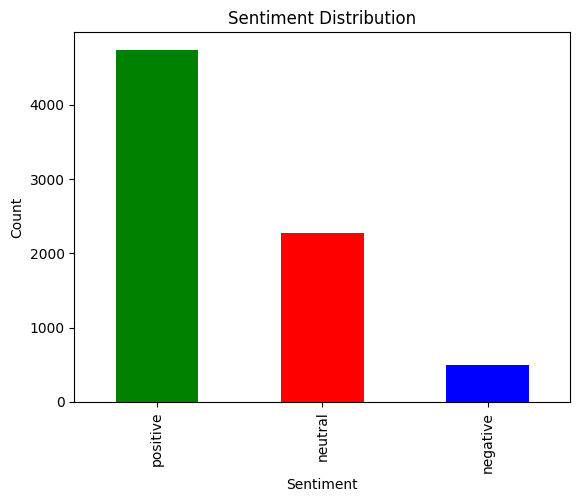

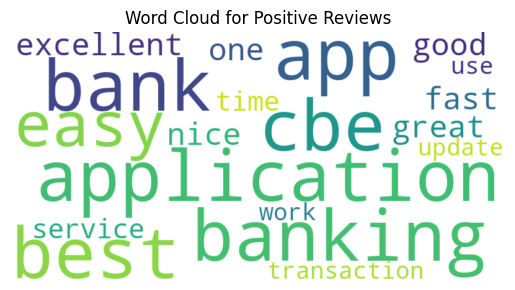

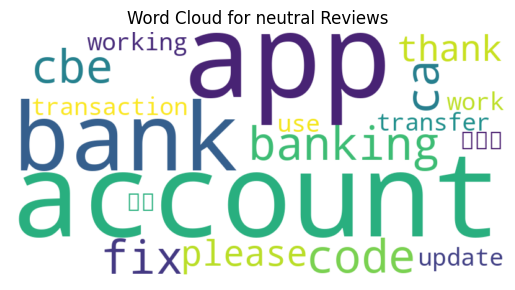

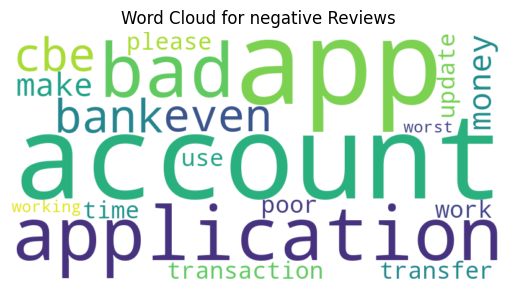

In [23]:
df['textBlob_result'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

positive_text = ' '.join(positive_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


neutral_text = ' '.join(neutral_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for neutral Reviews')
plt.show()


negative_text = ' '.join(negative_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for negative Reviews')
plt.show()

In [24]:
df.to_csv('final_data/commercial_analysis.csv')